In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("muted")

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load datasets
train_df = pd.read_csv('train.csv')  
test_df = pd.read_csv('test.csv')    
train_df.replace('-', np.nan, inplace=True)
test_df.replace('-', np.nan, inplace=True)
train_df['Mileage'] = train_df['Mileage'].astype(str).str.replace(' km', '').str.strip()
train_df['Mileage'] = pd.to_numeric(train_df['Mileage'], errors='coerce')
test_df['Mileage'] = test_df['Mileage'].astype(str).str.replace(' km', '').str.strip()
test_df['Mileage'] = pd.to_numeric(test_df['Mileage'], errors='coerce')

# Display basic dataset information
print("First 5 rows of the training set:")
display(train_df.head())
print("\nTraining set information:")
train_df.info()

First 5 rows of the training set:


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4



Training set information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              13418 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  int64  
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color        

In [3]:
print("\nMissing values statistics for the training set:")
display(train_df.isnull().sum())


Missing values statistics for the training set:


ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

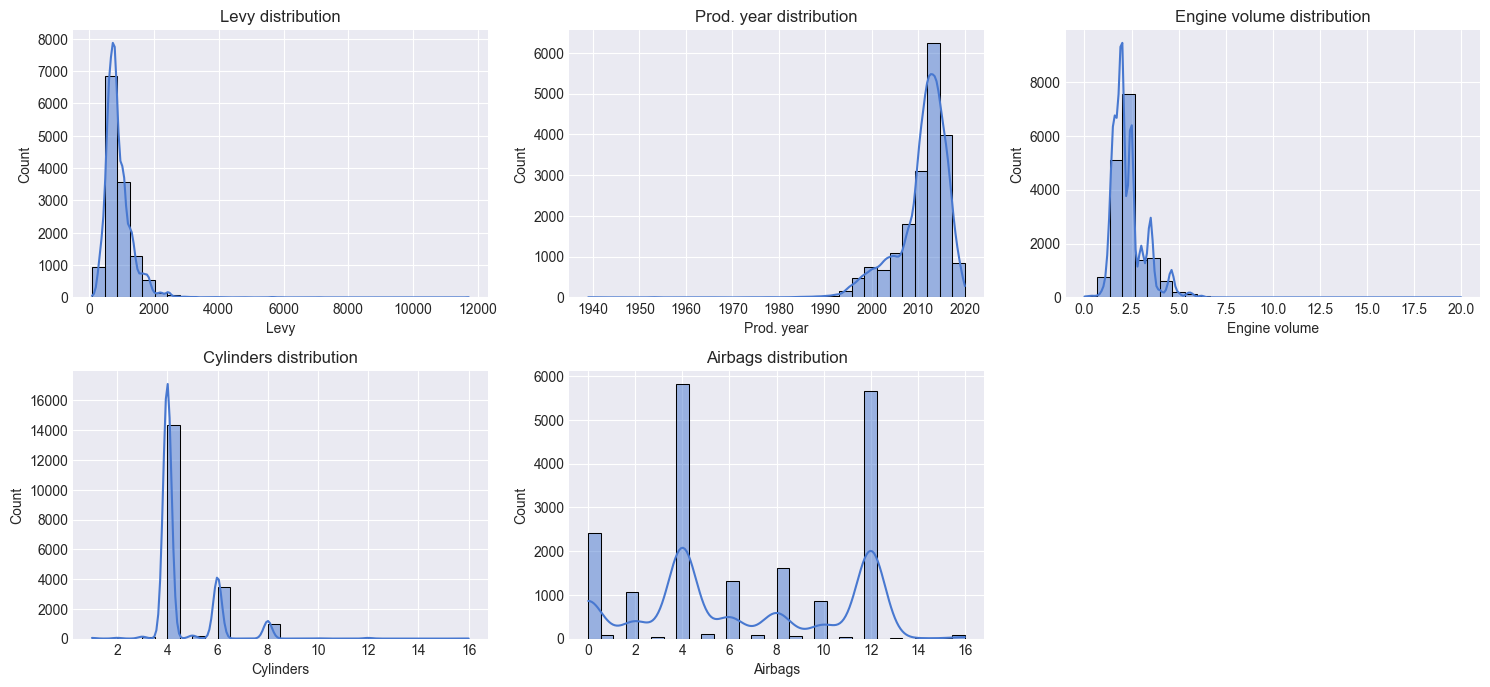

In [4]:
numerical_cols = ['Levy', 'Prod. year', 'Engine volume', 'Cylinders', 'Airbags']
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    # Convert to float to ensure proper plotting
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
    sns.histplot(train_df[col].dropna(), bins=30, kde=True)
    plt.title(f'{col} distribution')

plt.tight_layout()
plt.show()

In [5]:
categorical_cols = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 
                    'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']

for col in categorical_cols:
    # Convert column to string type, then process
    train_df[col] = train_df[col].astype(str).str.strip().str.lower()
    print(f"Number of unique values in {col}: {train_df[col].nunique()}")

Number of unique values in Manufacturer: 65
Number of unique values in Model: 1511
Number of unique values in Category: 11
Number of unique values in Leather interior: 2
Number of unique values in Fuel type: 7
Number of unique values in Gear box type: 4
Number of unique values in Drive wheels: 3
Number of unique values in Doors: 3
Number of unique values in Wheel: 2
Number of unique values in Color: 16


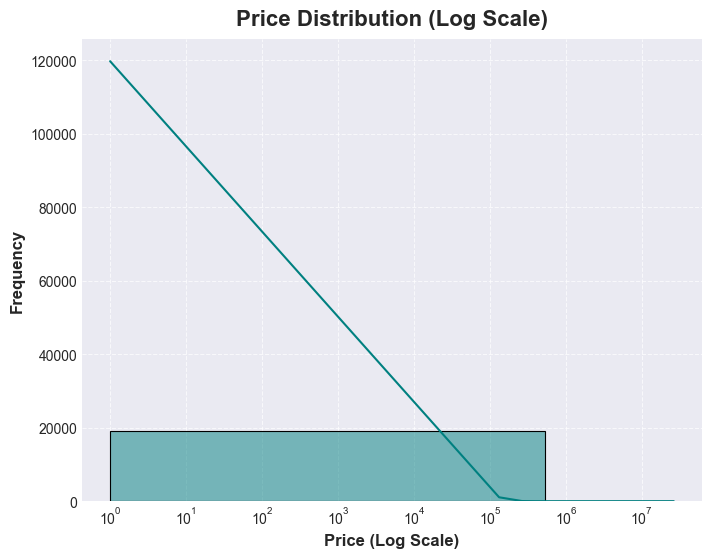

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Price'].dropna(), bins=50, kde=True, color='teal', edgecolor='black')

# Set X-axis to logarithmic scale
plt.xscale('log')

# Customize title and axis labels
plt.title('Price Distribution (Log Scale)', fontsize=16, weight='bold', pad=10)
plt.xlabel('Price (Log Scale)', fontsize=12, weight='semibold')
plt.ylabel('Frequency', fontsize=12, weight='semibold')

# Add grid and optimize borders
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()

# Show plot
plt.show()

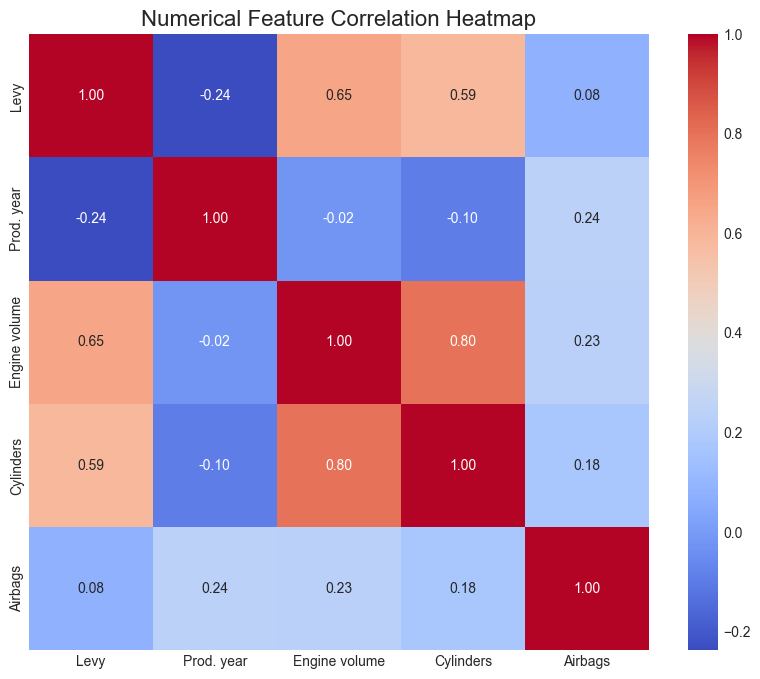

In [7]:
plt.figure(figsize=(10, 8))
correlation_matrix = train_df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Numerical Feature Correlation Heatmap', fontsize=16)
plt.show()

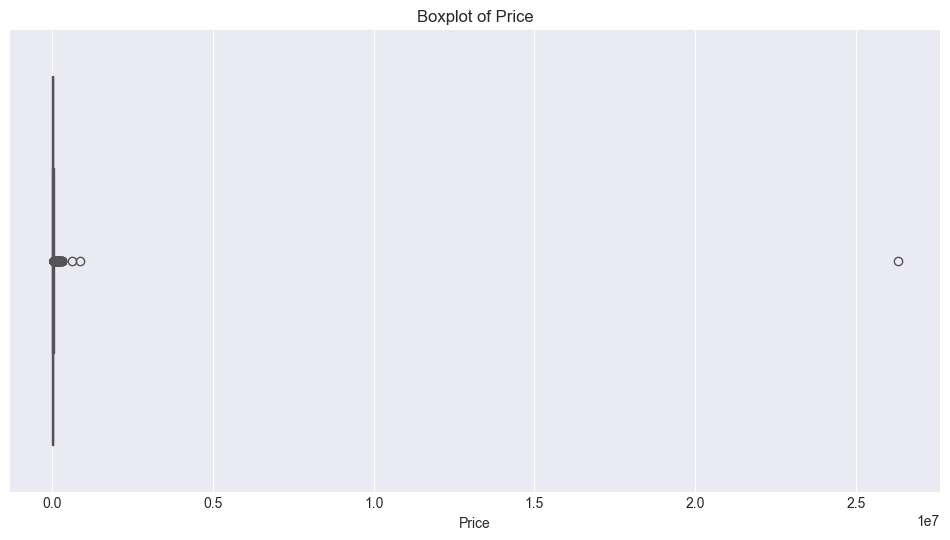

In [8]:
# Detecting Outliers in Car Prices
plt.figure(figsize=(12, 6))
sns.boxplot(x=train_df["Price"])
plt.title("Boxplot of Price")
plt.show()

In [9]:
# Handling missing values
for col in numerical_cols:
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')  # Ensure numeric type
    train_df[col].fillna(train_df[col].median(), inplace=True)  # Fill missing values with median

for col in categorical_cols:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)  # Fill missing values with mode

In [10]:
# Remove outliers in the price column
q1, q3 = train_df['Price'].quantile([0.25, 0.75])
iqr = q3 - q1
train_df = train_df[(train_df['Price'] >= q1 - 1.5 * iqr) & (train_df['Price'] <= q3 + 1.5 * iqr)]

In [11]:
print(train_df['Price'].describe())  # View statistical information (e.g., min, max, mean)
print(train_df['Price'].head(20))   # View the first 20 values to check for anomalies

count    18164.000000
mean     14024.917860
std      11377.779677
min          1.000000
25%       4861.000000
50%      12231.000000
75%      20071.000000
max      47120.000000
Name: Price, dtype: float64
0     13328
1     16621
2      8467
3      3607
4     11726
5     39493
6      1803
7       549
8      1098
9     26657
10      941
11     8781
12     3000
13     1019
15      549
16     7683
17    28382
18      549
19      941
20    18826
Name: Price, dtype: int64


In [12]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col].astype(str))
    label_encoders[col] = le
    # Optional: Print part of the encoding map for verification
    unique_values = le.classes_[:5]  # Show only the first 5 unique values
    encoded_values = le.transform(unique_values)
    print(f"Column {col} encoding example:")
    for orig, enc in zip(unique_values, encoded_values):
        print(f"  {orig} -> {enc}")

# Feature scaling
scaler = StandardScaler()
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
print(f"Features fitted by the scaler: {scaler.feature_names_in_}")  # Debug: Check fitted features

# Prepare features and target variable
X = train_df.drop(['ID', 'Price'], axis=1)
y = train_df['Price']
print(f"Training feature columns: {X.columns.tolist()}")  # Debug: Check feature columns

# Splitting the Training Dataset into Train and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.head(5))  # Display the first 5 rows for validation

Column Manufacturer encoding example:
  acura -> 0
  alfa romeo -> 1
  audi -> 2
  bmw -> 3
  buick -> 4
Column Model encoding example:
  09-mar -> 0
  100 -> 1
  100 nx -> 2
  1000 -> 3
  1111 -> 4
Column Category encoding example:
  cabriolet -> 0
  coupe -> 1
  goods wagon -> 2
  hatchback -> 3
  jeep -> 4
Column Leather interior encoding example:
  no -> 0
  yes -> 1
Column Fuel type encoding example:
  cng -> 0
  diesel -> 1
  hybrid -> 2
  hydrogen -> 3
  lpg -> 4
Column Gear box type encoding example:
  automatic -> 0
  manual -> 1
  tiptronic -> 2
  variator -> 3
Column Drive wheels encoding example:
  4x4 -> 0
  front -> 1
  rear -> 2
Column Doors encoding example:
  02-mar -> 0
  04-may -> 1
  >5 -> 2
Column Wheel encoding example:
  left wheel -> 0
  right-hand drive -> 1
Column Color encoding example:
  beige -> 0
  black -> 1
  blue -> 2
  brown -> 3
  carnelian red -> 4
Features fitted by the scaler: ['Levy' 'Prod. year' 'Engine volume' 'Cylinders' 'Airbags']
Training fea

In [13]:
print(f"Training set size: {X_train.shape}, Validation set size: {X_val.shape}, Test set size: {X_val.shape}")

Training set size: (12714, 16), Validation set size: (5450, 16), Test set size: (5450, 16)


In [14]:
# Initialize and train the baseline model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Prediction and evaluation
y_val_pred = baseline_model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation Mean Squared Error (MSE): {val_mse:.2f}")
print(f"Validation R² Score: {val_r2:.2f}")

Validation Mean Squared Error (MSE): 108041580.04
Validation R² Score: 0.16


In [15]:
# Baseline and Advanced ML Models for Performance Comparison

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
# from xgboost import XGBRegressor  # Uncomment if using XGBoost

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=10, random_state=42),
    # 'Support Vector Regression': SVR(kernel='rbf'),  # Uncomment if using SVR
    # 'XGBoost': XGBRegressor(n_estimators=10, random_state=42)  # Uncomment if using XGBoost
}

# Store model results
results = {'Model': [], 'MSE (Validation)': [], 'R² (Validation)': []}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    results['Model'].append(name)
    results['MSE (Validation)'].append(val_mse)
    results['R² (Validation)'].append(val_r2)

    print(f"{name} - Validation MSE: {val_mse:.2f}, R²: {val_r2:.2f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

Linear Regression - Validation MSE: 108041580.04, R²: 0.16
Random Forest - Validation MSE: 34613805.24, R²: 0.73
Gradient Boosting - Validation MSE: 86948120.51, R²: 0.32



Model Comparison Results:


,Model,MSE (Validation),R² (Validation)
0,Linear Regression,1.080416e+08,0.157030
1,Random Forest,3.461381e+07,0.729934
2,Gradient Boosting,8.694812e+07,0.321607


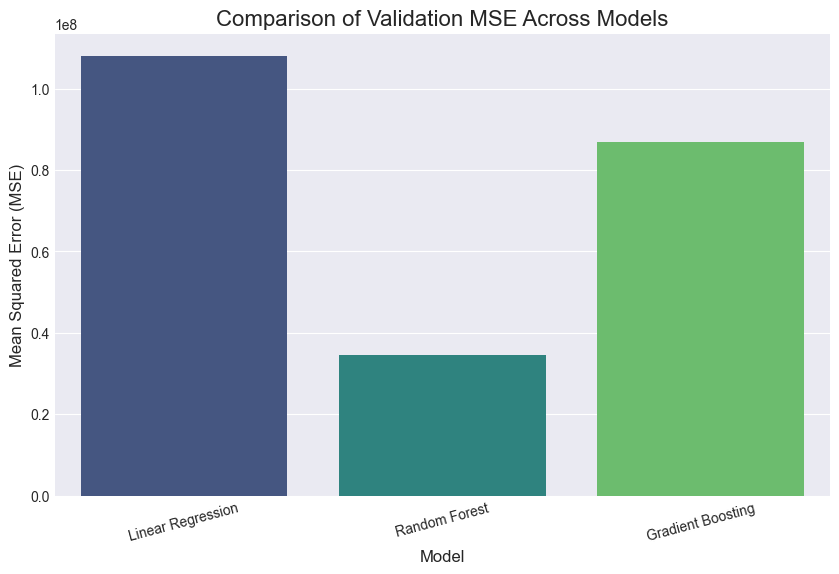

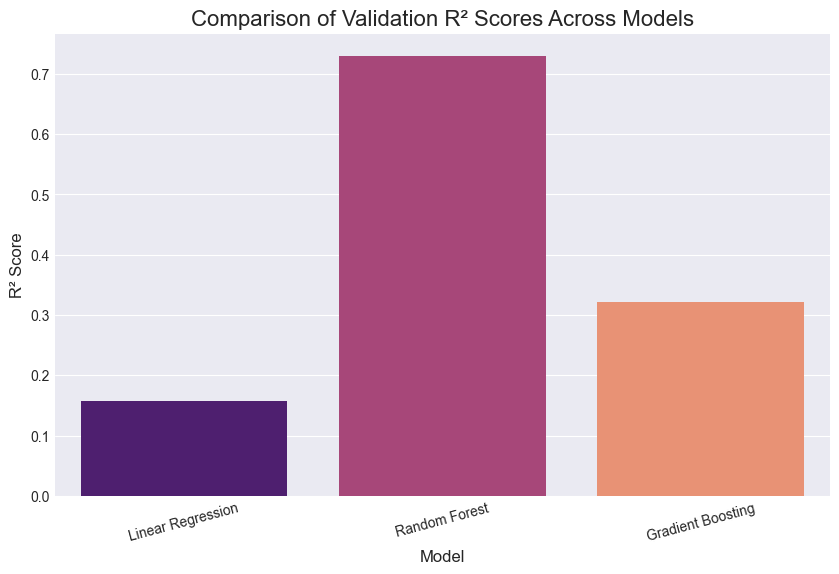

In [16]:
print("\nModel Comparison Results:")
display(results_df)

# MSE Comparison Chart (Updated Titles and Labels)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE (Validation)', data=results_df, palette='viridis')
plt.title('Comparison of Validation MSE Across Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xticks(rotation=15)
plt.show()

# R² Comparison Chart (Updated Titles and Labels)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R² (Validation)', data=results_df, palette='magma')
plt.title('Comparison of Validation R² Scores Across Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.xticks(rotation=15)
plt.show()

Based on the R² and MSE criteria, the best model without parameter optimization is Random Forest.

# Advantages of Random Forest in Car Price Prediction

## Capturing Nonlinear Relationships
The relationship between car prices and features (such as **Mileage**, **Engine volume**, **Horsepower**, etc.) is often **nonlinear**. Linear regression assumes a linear relationship between features and the target variable, whereas Random Forest, by constructing multiple decision trees, can capture complex nonlinear patterns.

## Strong Robustness
Random Forest is an **ensemble method** that reduces the risk of overfitting by averaging the predictions of multiple trees. Compared to a single decision tree, it is more robust to noise and outliers (such as extreme values in **Price** or **Mileage**).

## Feature Importance
Random Forest naturally supports **feature importance analysis**, helping to understand which variables (such as **Engine volume** or **Manufacturer**) contribute the most to price prediction. This is valuable for model interpretation.

## Adaptability to High-Dimensional Data
The dataset contains multiple features (both numerical and categorical, leading to higher dimensions after encoding). Random Forest efficiently handles high-dimensional data, whereas models like **SVR** may be more sensitive to feature count and require extensive hyperparameter tuning.

## Comparison with Other Models
| Model | Pros & Cons |
|------|--------|
| **Linear Regression** | Too simplistic, unable to capture nonlinear relationships, usually low R² |
| **Gradient Boosting** | More sensitive to hyperparameters, may underperform Random Forest without tuning |
| **SVR** | Sensitive to data scaling and kernel selection, performs well on small datasets but requires complex tuning for large-scale data |

In [18]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ======================================================================
# Grid Search Optimization to Address Poor Validation Performance
# ======================================================================

print("\n" + "="*80)
print("Starting Step-by-Step Grid Search and Improvement for Random Forest Model")
print("="*80)

# Initial Random Forest Configuration
rf_base = RandomForestRegressor(n_estimators=10, random_state=42)

# To address poor validation performance, we need to take the following measures:
# 1. Use a hierarchical grid search to save time
# 2. Expand the search space for regularization parameters
# 3. Include learning curve analysis to detect overfitting
# 4. Implement feature importance selection

# -------------- Stage 1: Baseline Model Evaluation --------------
print("\n===== Stage 1: Baseline Model Evaluation =====")
# First, evaluate the performance of the default parameters
start_time = time.time()
print("Training Random Forest with default parameters...")

rf_base.fit(X_train, y_train)
train_score = rf_base.score(X_train, y_train)
val_score = rf_base.score(X_val, y_val)

print(f"Baseline Model - Training R²: {train_score:.4f}, Validation R²: {val_score:.4f}")
print(f"Difference between Training and Validation R²: {train_score - val_score:.4f}")

# Check for overfitting
if train_score - val_score > 0.1:
    print("\n⚠️ Significant overfitting detected! Adjusting search strategy to enhance regularization.")
    overfitting = True
else:
    print("\nThe model does not appear to be severely overfitting, proceeding with standard parameter search.")
    overfitting = False

# -------------- Stage 2: Tuning Tree Complexity Parameters --------------
print("\n===== Stage 2: Tuning Tree Complexity Parameters =====")

# Adjust search range based on overfitting status
if overfitting:
    # If overfitting is detected, focus on restricting tree depth and increasing minimum sample size
    complexity_params = {
        'max_depth': [4, 6, 8, 10, None],
        'min_samples_split': [5, 10, 15],
        'min_samples_leaf': [2, 4, 8]
    }
    print("Overfitting detected, searching for more restrictive tree complexity parameters...")
else:
    # Standard search range
    complexity_params = {
        'max_depth': [8, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

# Using 3-fold cross-validation to save time
complexity_cv = GridSearchCV(
    RandomForestRegressor(n_estimators=100, random_state=42),
    complexity_params,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("\nSearching for optimal tree complexity parameters...")
with tqdm(total=1) as pbar:
    complexity_cv.fit(X_train, y_train)
    pbar.update(1)

best_complexity = complexity_cv.best_params_
best_complexity_score = complexity_cv.best_score_

print(f"\nOptimal tree complexity parameters: {best_complexity}")
print(f"Cross-validation R² score: {best_complexity_score:.4f}")

# -------------- Stage 3: Tuning Forest Size and Randomness --------------
print("\n===== Stage 3: Tuning Forest Size and Randomness =====")

# Construct parameter grid for forest tuning
forest_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['sqrt', 'log2', None]
}

# Maintain best tree complexity parameters
best_rf = RandomForestRegressor(
    max_depth=best_complexity['max_depth'],
    min_samples_split=best_complexity['min_samples_split'],
    min_samples_leaf=best_complexity['min_samples_leaf'],
    random_state=42
)

# Use full 5-fold cross-validation
forest_cv = GridSearchCV(
    best_rf,
    forest_params,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("\nSearching for optimal forest parameters...")
with tqdm(total=1) as pbar:
    forest_cv.fit(X_train, y_train)
    pbar.update(1)

best_forest = forest_cv.best_params_
best_forest_score = forest_cv.best_score_

print(f"\nOptimal forest parameters: {best_forest}")
print(f"Cross-validation R² score: {best_forest_score:.4f}")

# -------------- Stage 4: Integrating Best Parameters and Adding Regularization --------------
print("\n===== Stage 4: Integrating Best Parameters and Adding Regularization =====")

# Add additional regularization parameters if overfitting is detected
if overfitting:
    print("Overfitting detected, expanding search for additional regularization parameters...")
    final_params = {
        'bootstrap': [True, False],
        'oob_score': [True, False],
        'ccp_alpha': [0.0, 0.001, 0.01]  # Cost complexity pruning parameter
    }
else:
    final_params = {
        'bootstrap': [True, False],
        'oob_score': [True, False]
    }

# Integrate previously found best parameters
final_rf = RandomForestRegressor(
    n_estimators=best_forest['n_estimators'],
    max_features=best_forest['max_features'],
    max_depth=best_complexity['max_depth'],
    min_samples_split=best_complexity['min_samples_split'],
    min_samples_leaf=best_complexity['min_samples_leaf'],
    random_state=42
)

# Final grid search
final_cv = GridSearchCV(
    final_rf,
    final_params,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("\nPerforming final parameter search...")
with tqdm(total=1) as pbar:
    final_cv.fit(X_train, y_train)
    pbar.update(1)

best_final = final_cv.best_params_
best_final_score = final_cv.best_score_

print(f"\nFinal optimal parameters: {best_final}")
print(f"Cross-validation R² score: {best_final_score:.4f}")

# -------------- Stage 5: Feature Importance Analysis and Selection --------------
print("\n===== Stage 5: Feature Importance Analysis and Selection =====")

# Merge all best parameters
all_best_params = {
    'n_estimators': best_forest['n_estimators'],
    'max_features': best_forest['max_features'],
    'max_depth': best_complexity['max_depth'],
    'min_samples_split': best_complexity['min_samples_split'],
    'min_samples_leaf': best_complexity['min_samples_leaf'],
    **best_final
}

print(f"\nMerged best parameters: {all_best_params}")

# Train model with all best parameters
best_model = RandomForestRegressor(**all_best_params, random_state=42)
best_model.fit(X_train, y_train)

# Compute feature importance
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Retrieve feature names
feature_names = X_train.columns

# Print feature importance ranking
print("\nFeature Importance Ranking:")
for i, idx in enumerate(indices[:10]):  # Show top 10
    print(f"{i+1}. {feature_names[idx]}: {importances[idx]:.4f}")

# Attempt feature selection to improve validation performance
print("\nAttempting feature selection based on feature importance to improve validation performance...")

# Select features with importance greater than the average value
importance_threshold = np.mean(importances)
selected_indices = np.where(importances > importance_threshold)[0]
print(f"Selected {len(selected_indices)}/{len(importances)} features (Importance > {importance_threshold:.4f})")

# Train the model using selected features
X_train_selected = X_train.iloc[:, selected_indices] if hasattr(X_train, 'iloc') else X_train[:, selected_indices]
X_val_selected = X_val.iloc[:, selected_indices] if hasattr(X_val, 'iloc') else X_val[:, selected_indices]

selection_model = RandomForestRegressor(**all_best_params, random_state=42)
selection_model.fit(X_train_selected, y_train)

# Evaluate the effect of feature selection
train_score_selected = selection_model.score(X_train_selected, y_train)
val_score_selected = selection_model.score(X_val_selected, y_val)

print(f"\nAfter feature selection - Training R²: {train_score_selected:.4f}, Validation R²: {val_score_selected:.4f}")
print(f"Difference between Training and Validation R²: {train_score_selected - val_score_selected:.4f}")


# -------------- Stage 6: Final Model Evaluation and Comparison --------------
print("\n===== Stage 6: Final Model Evaluation and Comparison =====")

# Compare the performance of different models
models = {
    "Baseline Model": {"train": train_score, "val": val_score},
    "Best Parameter Model": {
        "train": best_model.score(X_train, y_train),
        "val": best_model.score(X_val, y_val)
    },
    "Feature Selection Model": {"train": train_score_selected, "val": val_score_selected}
}

# Print comparison results
print("\nModel Performance Comparison:")
print("-" * 60)
print(f"{'Model':<15} | {'Train R²':<12} | {'Validation R²':<12} | {'Difference':<10}")
print("-" * 60)
for name, scores in models.items():
    diff = scores["train"] - scores["val"]
    print(f"{name:<15} | {scores['train']:<12.4f} | {scores['val']:<12.4f} | {diff:<10.4f}")

# Select the final model - the one with the best validation performance
best_val_score = -1
best_model_name = ""
for name, scores in models.items():
    if scores["val"] > best_val_score:
        best_val_score = scores["val"]
        best_model_name = name

print("\n" + "="*80)
print(f"Best Model: {best_model_name}, Validation R²: {best_val_score:.4f}")
print("="*80)

# Choose the final model for deployment based on the best model
if best_model_name == "Baseline Model":
    final_model = rf_base
elif best_model_name == "Feature Selection Model":
    final_model = selection_model
    print("\nFinal model: Feature Selection Model, selected features:")
    selected_features = [feature_names[i] for i in selected_indices]
    for i, feat in enumerate(selected_features[:10]):
        print(f"{i+1}. {feat}")
    if len(selected_features) > 10:
        print(f"...Total {len(selected_features)} features")
else:
    final_model = best_model

print("\nModel training and tuning complete! The best validation model has been selected.")
print(f"Final Model Validation R²: {best_val_score:.4f}")


Starting Step-by-Step Grid Search and Improvement for Random Forest Model

===== Stage 1: Baseline Model Evaluation =====
Training Random Forest with default parameters...
Baseline Model - Training R²: 0.9465, Validation R²: 0.7299
Difference between Training and Validation R²: 0.2166

⚠️ Significant overfitting detected! Adjusting search strategy to enhance regularization.

===== Stage 2: Tuning Tree Complexity Parameters =====
Overfitting detected, searching for more restrictive tree complexity parameters...

Searching for optimal tree complexity parameters...


  0%|          | 0/1 [00:00<?, ?it/s]

Fitting 3 folds for each of 45 candidates, totalling 135 fits


100%|██████████| 1/1 [00:38<00:00, 38.26s/it]



Optimal tree complexity parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Cross-validation R² score: 0.7262

===== Stage 3: Tuning Forest Size and Randomness =====

Searching for optimal forest parameters...


  0%|          | 0/1 [00:00<?, ?it/s]

Fitting 5 folds for each of 12 candidates, totalling 60 fits


100%|██████████| 1/1 [00:55<00:00, 55.08s/it]



Optimal forest parameters: {'max_features': None, 'n_estimators': 300}
Cross-validation R² score: 0.7413

===== Stage 4: Integrating Best Parameters and Adding Regularization =====
Overfitting detected, expanding search for additional regularization parameters...

Performing final parameter search...


  0%|          | 0/1 [00:00<?, ?it/s]

Fitting 5 folds for each of 12 candidates, totalling 60 fits


100%|██████████| 1/1 [01:35<00:00, 95.48s/it]



Final optimal parameters: {'bootstrap': True, 'ccp_alpha': 0.01, 'oob_score': True}
Cross-validation R² score: 0.7413

===== Stage 5: Feature Importance Analysis and Selection =====

Merged best parameters: {'n_estimators': 300, 'max_features': None, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': True, 'ccp_alpha': 0.01, 'oob_score': True}

Feature Importance Ranking:
1. Prod. year: 0.2299
2. Airbags: 0.1113
3. Mileage: 0.1106
4. Levy: 0.0802
5. Fuel type: 0.0779
6. Gear box type: 0.0729
7. Model: 0.0707
8. Engine volume: 0.0652
9. Manufacturer: 0.0428
10. Cylinders: 0.0423

Attempting feature selection based on feature importance to improve validation performance...
Selected 8/16 features (Importance > 0.0625)

After feature selection - Training R²: 0.9095, Validation R²: 0.7312
Difference between Training and Validation R²: 0.1783

===== Stage 6: Final Model Evaluation and Comparison =====

Model Performance Comparison:
-------------------------------

In [19]:
# Final Save of All Required Components
import pickle

model_components = {
    'model': best_model,  # The best trained model
    'label_encoders': label_encoders,  # Encoders for categorical features
    'scaler': scaler,  # Scaler for numerical features
    'numerical_cols': numerical_cols,  # List of numerical features
    'categorical_cols': categorical_cols,  # List of categorical features
    'numerical_impute_values': {col: train_df[col].median() for col in numerical_cols},  # Values for imputing missing numerical data
    'categorical_impute_values': {col: train_df[col].mode()[0] for col in categorical_cols},  # Values for imputing missing categorical data
    'model_features': X_train.columns.tolist(),  # Save model feature names
    'price_thresholds': {  # Thresholds for price outlier detection
        'q1': q1,
        'q3': q3,
        'iqr': iqr
    }
}

# Save selected indices only if the feature selection model is used
if best_model_name == "Feature Selection Model":
    model_components['selected_indices'] = selected_indices
    model_components['feature_names'] = feature_names
else:
    model_components['selected_indices'] = None

with open('car_price_prediction_components.pkl', 'wb') as f:
    pickle.dump(model_components, f)

print("Training completed, and all necessary data processing components have been saved.")

Training completed, and all necessary data processing components have been saved.


In [20]:
# --- New: Testing Inference Logic ---
print("\n=== Testing Inference Logic ===")

# Sample input data (consistent with FastAPI test)
test_input = {
    'Manufacturer': 'TOYOTA',
    'Model': 'Camry',
    'Category': 'Sedan',
    'Leather_interior': 'Yes',
    'Fuel_type': 'Petrol',
    'Gear_box_type': 'Automatic',
    'Drive_wheels': 'Front',
    'Doors': "04-May",  
    'Wheel': 'Left wheel',
    'Color': 'Black',
    'Levy': 1200,
    'Prod. year': 2018,
    'Engine_volume': 2.5,
    'Cylinders': 4,
    'Airbags': 8,
    'Mileage': 25000
}

# Convert input to DataFrame
input_df = pd.DataFrame([test_input])
input_df.columns = [col.replace('_', ' ') for col in input_df.columns]
print(f"Test input data: {input_df.to_dict()}")

# Handle missing values
for col in model_components['numerical_cols']:
    if col in input_df.columns:
        input_df[col] = pd.to_numeric(input_df[col], errors='coerce')
        if pd.isna(input_df[col]).any():
            input_df[col].fillna(model_components['numerical_impute_values'][col], inplace=True)

for col in model_components['categorical_cols']:
    if col in input_df.columns:
        if pd.isna(input_df[col]).any():
            input_df[col].fillna(model_components['categorical_impute_values'][col], inplace=True)
        # Convert to lowercase and handle "Doors" formatting
        input_df[col] = input_df[col].astype(str).str.lower().str.strip()
        print(input_df[col])

# Apply label encoding
for col in model_components['categorical_cols']:
    if col in input_df.columns:
        encoder = model_components['label_encoders'][col]
        valid_values = input_df[col].apply(lambda x: x if x in encoder.classes_ else model_components['categorical_impute_values'][col])
        try:
            input_df[col] = encoder.transform(valid_values)
        except ValueError as e:
            print(f"Encoding error in feature {col}: {str(e)}")
            raise

# Apply numerical feature scaling
cols_to_scale = [col for col in model_components['numerical_cols'] if col in input_df.columns]
if cols_to_scale:
    input_df[cols_to_scale] = model_components['scaler'].transform(input_df[cols_to_scale])

# Ensure feature order is consistent with training

features = input_df[model_components['model_features']]

# If using the feature selection model
if model_components.get('selected_indices') is not None:
    features = features.iloc[:, model_components['selected_indices']]

# Predict price
predicted_price = model_components['model'].predict(features)[0]
print(f"Predicted Price: {predicted_price}")

print("Inference test completed")


=== Testing Inference Logic ===
Test input data: {'Manufacturer': {0: 'TOYOTA'}, 'Model': {0: 'Camry'}, 'Category': {0: 'Sedan'}, 'Leather interior': {0: 'Yes'}, 'Fuel type': {0: 'Petrol'}, 'Gear box type': {0: 'Automatic'}, 'Drive wheels': {0: 'Front'}, 'Doors': {0: '04-May'}, 'Wheel': {0: 'Left wheel'}, 'Color': {0: 'Black'}, 'Levy': {0: 1200}, 'Prod. year': {0: 2018}, 'Engine volume': {0: 2.5}, 'Cylinders': {0: 4}, 'Airbags': {0: 8}, 'Mileage': {0: 25000}}
0    toyota
Name: Manufacturer, dtype: object
0    camry
Name: Model, dtype: object
0    sedan
Name: Category, dtype: object
0    yes
Name: Leather interior, dtype: object
0    petrol
Name: Fuel type, dtype: object
0    automatic
Name: Gear box type, dtype: object
0    front
Name: Drive wheels, dtype: object
0    04-may
Name: Doors, dtype: object
0    left wheel
Name: Wheel, dtype: object
0    black
Name: Color, dtype: object
Predicted Price: 30780.773930615665
Inference test completed
